In [10]:
import sys
sys.path.append("..")

%load_ext autoreload
%autoreload 2

from sicm import io, analysis
from sicm.plots import plots
import glob
import os
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
parent = "S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition"
files = glob.glob(parent + "/*/dev662_demods_[0-9]_sample_00000.csv")
files

['S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_contact3_1_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_contact3_2_ethanol_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_contact_1_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_contact_2_1_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_contact_2_2_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_noncontact_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_noncontact_1_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_noncontact_1_001\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_noncontact_2_000\\dev662_demods_0_sample_00000.c

In [12]:
#(!) In Contact: chunk = 5, idx = 9, guess = (.001, 1e2, 31e3*2*np.pi, 1e2)
# In Contact: chunk = 1, idx = 3, guess = (.001, 1e2, 35.15e3*2*np.pi, 1e3)
# In Contact: chunk = 1, idx = 6, guess = (.001, 1e2, 35.15e3*2*np.pi, 1e3)
# In Contact: chunk = 0, idx = 8, guess = (.001, 1e2, 33.15e3*2*np.pi, 1e3)

#(!) NOT Contact: chunk = 1, idx = 5, guess = (.015, 1e4, 32.78e3*2*np.pi, 1)

In [13]:
chunk = 5 #1
idx =  0 #5
datadir = os.path.dirname(files[idx])
file = os.path.basename(files[idx])
print("Using data from {}.".format(datadir))

Using data from S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\sweep_contact3_1_000.


Exctracting chunk 5 from file S:\UsersData\Martin\2018\12_Dec\10\qtf_deposition\sweep_contact3_1_000\dev662_demods_0_sample_00000.csv.
Experiment time: 10/12/2018 14:56, # of points: 500


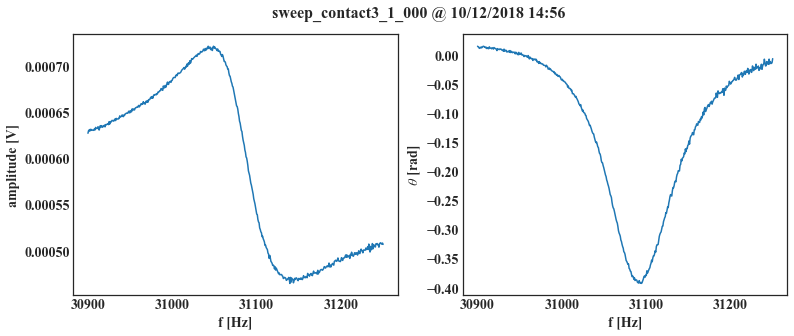

In [14]:
data, date = io.load_data_lockin(datadir, file, chunk)
plots.plot_lockin(data, date = date, name = datadir.split("\\")[-1],
                  keys = list(zip(2*["frequency"], ["r", "phase"])))

Expecting 4 paramters in fit.
Fitting Fitter.lorentzian_fun to 500 datapoints ...
Found parameters: [2.53770931e-04 3.31887411e+02 1.95300489e+05 7.53377800e+02].
Finished in 0.005 s
Presumed Resonator Parameters: 
{'R': 23750, 'L': 40.35999105117211, 'C': 6.49594404437088e-13, 'C0': 4.893900033891503e-10, 'I0': 1.0685091817708796e-08, 'V0': 0.00025377093067058395}
Saved figure to lorentzian_fit.


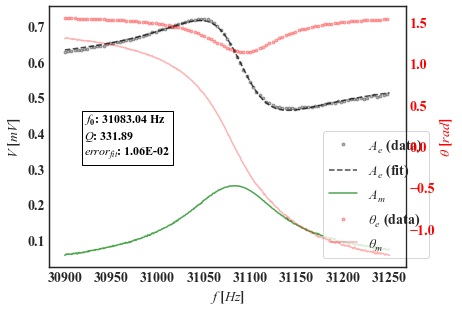

In [15]:
# TODO: add selction of frequency range
# TODO: For verly low-Q oscillators, the f0 shifts. Is this to be expected?
from math import ceil

guess = (.001, 1e2, 31e3*2*np.pi, 1e2) # idx9
# guess = (.015, 1e4, 32.78e3*2*np.pi, 1) # idx5
# guess = (.001, 1e2, 33.15e3*2*np.pi, 1e3)
# Driving voltage
V_out = ceil(1e5*(max(data["r"]) * np.sqrt(2)))/1e5
fitter = analysis.Fitter([data["frequency"], data["r"], data["phase"]+np.pi/2],
                         V_out, guess, date)
fitter.process()

In [51]:
np.max(fitter.data[1])

0.000722437

# Another Experiment

In [16]:
parent = "S:/UsersData/Martin/2018/12_Dec/12/session_20181212_142119_00"
files = glob.glob(parent + "/*/dev662_demods_[0-9]_sample_00000.csv")
files

['S:/UsersData/Martin/2018/12_Dec/12/session_20181212_142119_00\\sweep_contact_water_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/12/session_20181212_142119_00\\sweep_contact_water_attheend_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/12/session_20181212_142119_00\\sweep_test_000\\dev662_demods_0_sample_00000.csv']

In [17]:
chunk = 0
idx = 1
datadir = os.path.dirname(files[idx])
file = os.path.basename(files[idx])
print("Using data from {}.".format(datadir))

Using data from S:/UsersData/Martin/2018/12_Dec/12/session_20181212_142119_00\sweep_contact_water_attheend_000.


Exctracting chunk 0 from file S:\UsersData\Martin\2018\12_Dec\12\session_20181212_142119_00\sweep_contact_water_attheend_000\dev662_demods_0_sample_00000.csv.
Experiment time: 12/12/2018 18:52, # of points: 500


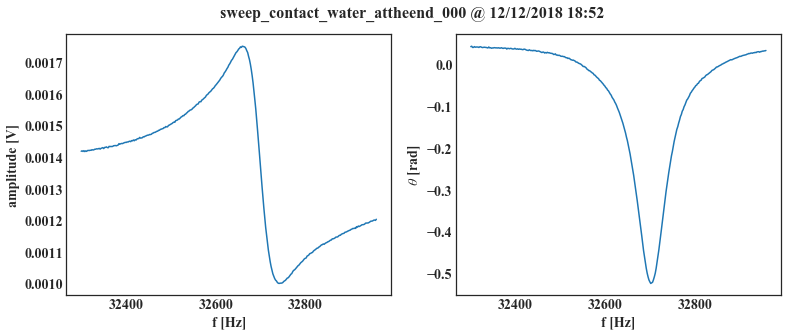

In [18]:
data, date = io.load_data_lockin(datadir, file, chunk)
plots.plot_lockin(data, date = date, name = datadir.split("\\")[-1],
                  keys = list(zip(2*["frequency"], ["r", "phase"])))

Expecting 4 paramters in fit.
Fitting Fitter.lorentzian_fun to 329 datapoints ...
Found parameters: [7.63560773e-04 3.59989834e+02 2.05389526e+05 6.27750610e+02].
Finished in 0.004 s
Presumed Resonator Parameters: 
{'R': 21463.0847, 'L': 37.618725899086705, 'C': 6.301433120776073e-13, 'C0': 3.9557284868514315e-10, 'I0': 3.5575537406781506e-08, 'V0': 0.0007635607726097697}
Saved figure to lorentzian_fit.


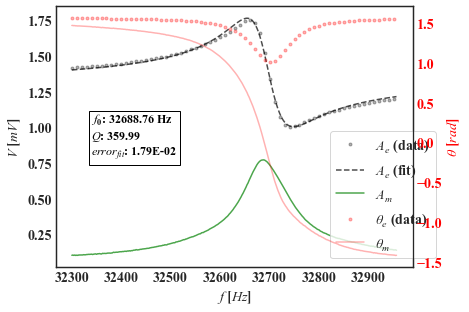

In [19]:
guess = [.001, 1e2, 32.6e3*2*np.pi, 1e2]
# guess = (.015, 1e4, 32.78e3*2*np.pi, 1)
# guess = (.001, 1e2, 33.15e3*2*np.pi, 1e3)
V_out = ceil(1e5*(max(data["r"]) * np.sqrt(2)))/1e5
fitter = analysis.Fitter([data["frequency"], data["r"], data["phase"]+np.pi/2],
                         V_out, guess, date)
fitter.process()

In [39]:
np.max(fitter.r_m)

0.0007731064813141753

# Obtaining Relationship for Oscillation Magnitude

We follow the approach by *Dagdeviren et al, 2018;* as described in `qtf_calibration.md` document.

In [1]:
import sys
sys.path.append("..")

from sicm.plots import plots
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
V_readout = np.linspace(500e-6, 900e-6, 100) # [V]  .. compensated value of readout voltage

def Aosc(V, do_plot = False):
    """Calculate and plot the calibration of the oscilator
    
    Parameters
    -----------
    V: np.ndarray
        Compensated readut voltage as peak value
    do_plot: bool
        Plot the oscillation amplitude?
    
    Returns
    -----------
    None
    
    """
    # The following parameters are obtained as above from:
    # ":/UsersData/Martin/2018/12_Dec/12/session_20181212_142119_00\sweep_contact_water_attheend_00"
    Q = 360 # [-] .. quality factor
    f0 = 32688.76 # [1/s] .. natural frequency
    V_drive = 0.1 / np.sqrt(2) # [V] .. driving voltage
    # The spring constant was obtained as descibed in qtd_calibration.md
    k1 = 21720 # [N/m] .. spring constant
    # The gain of the setup is obtained in `lockin.ipynb` from:
    # "S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation/sweep_1MOhm_range1_100mV_2long50OhmCables_for_real_through_fork_000"
    # G0 = [11639.955174876579]
    # or "S:\UsersData\Martin\2018\12_Dec\17\lockin_characterisation\sweep_1MOhm_range1_100mV_short50OhmCable_000\dev662_demods_3_sample_00000.csv"
    # giving somewhat different values, but not importantly different.
    G0 = [21463.0847]
    
    V *= 1e3 / np.sqrt(2) # convert to RMS [mV]
    
    Xs = []
    Ys = []
    legs = []
    for g in G0:
        alpha = np.sqrt((Q * V_drive) / (2 * np.pi * f0 * k1 * g))
        alpha *= 1e10 / np.sqrt(1e3) # convert to [Angst / sqrt(mV)]
        
        amp_osc = alpha * np.sqrt(V)
        
        Xs.append(V)
        Ys.append(amp_osc)
        
        leg = r"$\rm{{\alpha}}$ = {:.2f} [$\rm{{ Å / (mV^{{-1/2}})}}$]"
        legs.append(leg.format(alpha))
        
        
    if do_plot:
        fname = "qtf_calibration_curve.svg"
        txt = r"$\rm{ A_{osc} = \alpha \cdot \sqrt{V_{RMS\ readout}^{\ '}}}$" 
        ylab = [r"$\rm{A_{osc}}$ [Å]"]
        xlab = [r"$\rm{V_{RMS\ readout}^{\ '}}$ [$\rm{mV}$]"]
        plots.plot_generic(Xs, Ys, xlab, ylab, 
                           legend = legs, text = txt, 
                           text_loc = (0.3, 0.05), fname = fname)
    return Ys
        

Font 'rm' does not have a glyph for '\\cdot' [U+22c5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\cdot' [U+22c5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\cdot' [U+22c5], substituting with a dummy symbol.


Saved figure to qtf_calibration_curve.svg.


[array([120.55603379])]

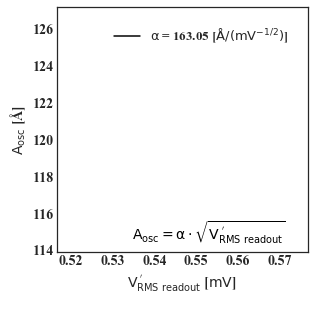

In [4]:
Aosc(np.asarray([0.7731e-3]), do_plot = True)

-------
## Not used anymore

32786.0

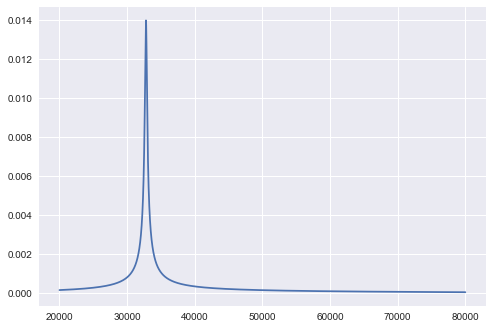

In [152]:
import matplotlib.pyplot as plt
import numpy as np
xx = np.arange(2e4, 8e4)
# xx = data["frequency"]
yy = analysis.Fitter.lorentzian_fun(xx, *(.014, 1e2, 20.6e4, .1))
plt.plot(xx, yy)
xx[np.argmax(yy)]